In [1]:
! pip install --upgrade --user numpy scipy matplotlib ipython jupyter pandas sympy nose  netcdf4 
! pip install --user --upgrade pixiedust

Requirement already up-to-date: numpy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: scipy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: matplotlib in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: ipython in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: jupyter in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: pandas in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: sympy in /gpfs/global_fs01/s

In [2]:
! pip install --user --upgrade PyWavelets

Requirement already up-to-date: PyWavelets in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: numpy>=1.9.1 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages (from PyWavelets)


In [3]:
from io import StringIO
from scipy import signal
from matplotlib import pylab as pl
from mpl_toolkits.mplot3d.axes3d import Axes3D
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pixiedust

Pixiedust database opened successfully


In [4]:
# The code was removed by DSX for sharing.

TRANSACTION_ID    HHMMSS     RESP 
0           YZL2  11.00.00  0.159995
1           YZL2  11.00.01  0.120319
2           YZL2  11.00.02  0.201928
3           YZL2  11.00.03  0.210998
4           YZL2  11.00.04  0.145653

In [5]:
dfpost = pd.read_csv(get_object_storage_file_with_credentials_54e5635a8b7a4b16843aedb7a189b81b('AnalisiSpettraleDati', 'Response_YZL2_20160104_PostEliminazioneSpikeListener.csv'),";", decimal=",")
dfpost.head()

TRANSACTION_ID    HHMMSS      Resp
0           YZL2  11:05:00  0.031522
1           YZL2  11:05:01  0.045029
2           YZL2  11:05:02  0.046101
3           YZL2  11:05:03  0.070186
4           YZL2  11:05:04  0.040317

In [6]:
timesec=np.arange(1,660,1)

In [50]:
respPre=np.squeeze(np.asarray(np.delete(dfpre.values,[0,1],axis=1)))
respPost =np.squeeze(np.asarray(np.delete(dfpost.values,[0,1],axis=1)))
print(respPre.size)
print(respPost.size)
print(timesec.size)
print(np.average(np.asarray(np.delete(dfpre.values,[0,1],axis=1), dtype=np.float32)))
print(np.std(np.asarray(np.delete(dfpre.values,[0,1],axis=1), dtype=np.float32)))
print(np.average(np.asarray(np.delete(dfpost.values,[0,1],axis=1), dtype=np.float32)))
print(np.std(np.asarray(np.delete(dfpost.values,[0,1],axis=1), dtype=np.float32)))

659
659
659
0.0961095
0.0740354
0.0482319
0.0800358



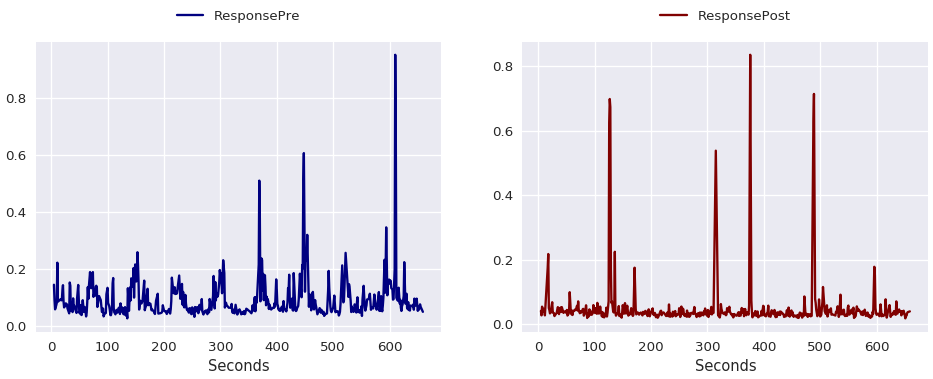

In [8]:
pd_signals=pd.DataFrame(data={'ResponsePre':respPre, 'ResponsePost':respPost,'Seconds':timesec},dtype=float)
display(pd_signals)

In [9]:
f, Pxx_spec = signal.welch(respPre, window ='boxcar',fs=1.0,nperseg =256,  scaling='spectrum') 
f1, Pxx_spec1 = signal.welch(respPost, window ='boxcar',fs=1.0, nperseg =256,  scaling='spectrum')


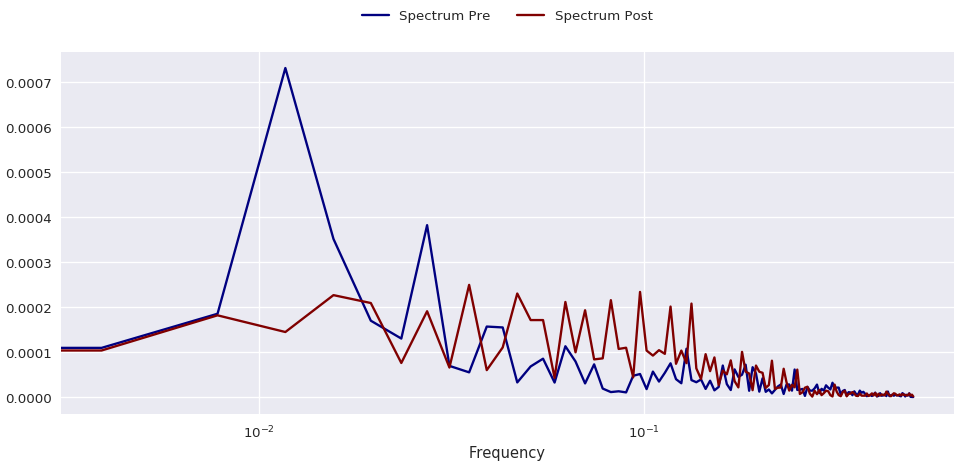

In [10]:
pd_spectre=pd.DataFrame(data={'Spectrum Pre':np.squeeze(np.absolute(Pxx_spec)), 'Spectrum Post':np.squeeze(np.absolute(Pxx_spec1)),'Frequency':f},dtype=float)
display(pd_spectre)

In [11]:
delta_spectre= np.squeeze(np.absolute(Pxx_spec))- np.squeeze(np.absolute(Pxx_spec1))


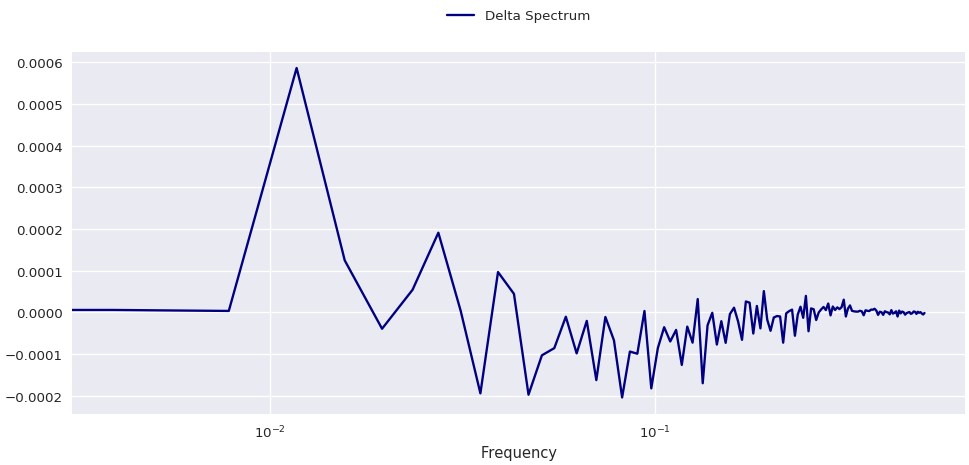

In [12]:
pd_delta_spectre=pd.DataFrame(data={'Delta Spectrum':delta_spectre,'Frequency':f},dtype=float)
display(pd_delta_spectre)

In [13]:
 pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

/gpfs/fs01/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


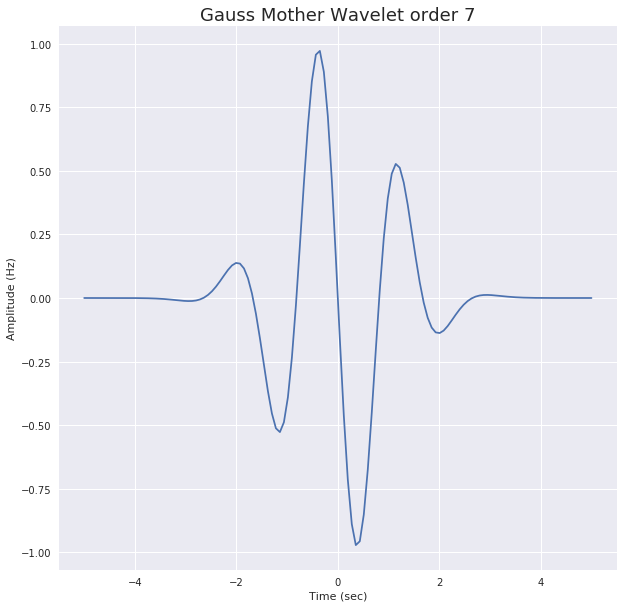

In [14]:
wavelet = pywt.ContinuousWavelet('gaus7')
plt.figure(figsize = (10,10))
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (Hz)')
plt.title('Gauss Mother Wavelet order 7', fontsize=18)
psi, x = wavelet.wavefun(level=7)
plt.plot(x,psi)
plt.show()

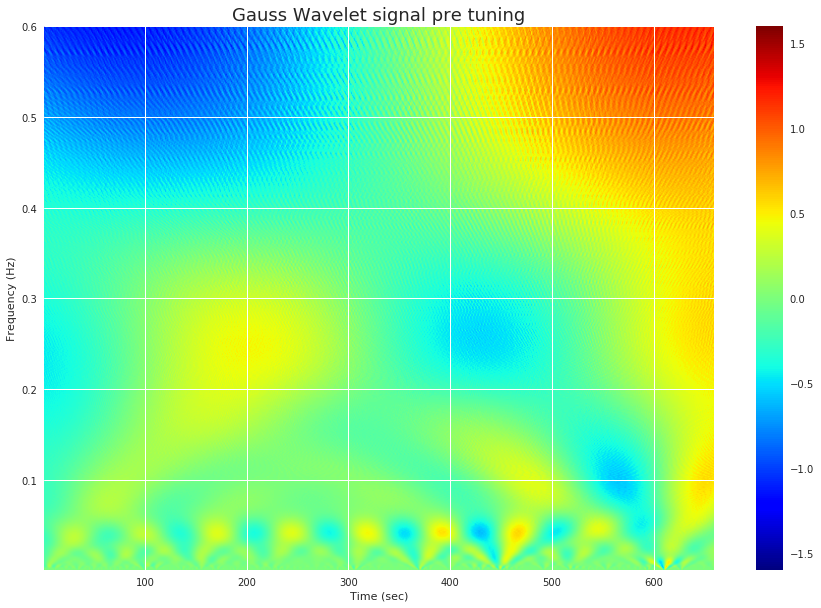

In [15]:
cwtmatr, freqs = pywt.cwt(respPre, timesec, 'gaus7')
plt.figure(figsize = (15,10))
#im = plt.imshow(cwtmatr, extent=[timesec.min(), timesec.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto', interpolation ='bilinear',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max(), origin='lower')
im = plt.imshow(cwtmatr, extent=[timesec.min(), timesec.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto', vmax= 1.6, vmin=-1.6, interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss Wavelet signal pre tuning', fontsize=18)
plt.show() 

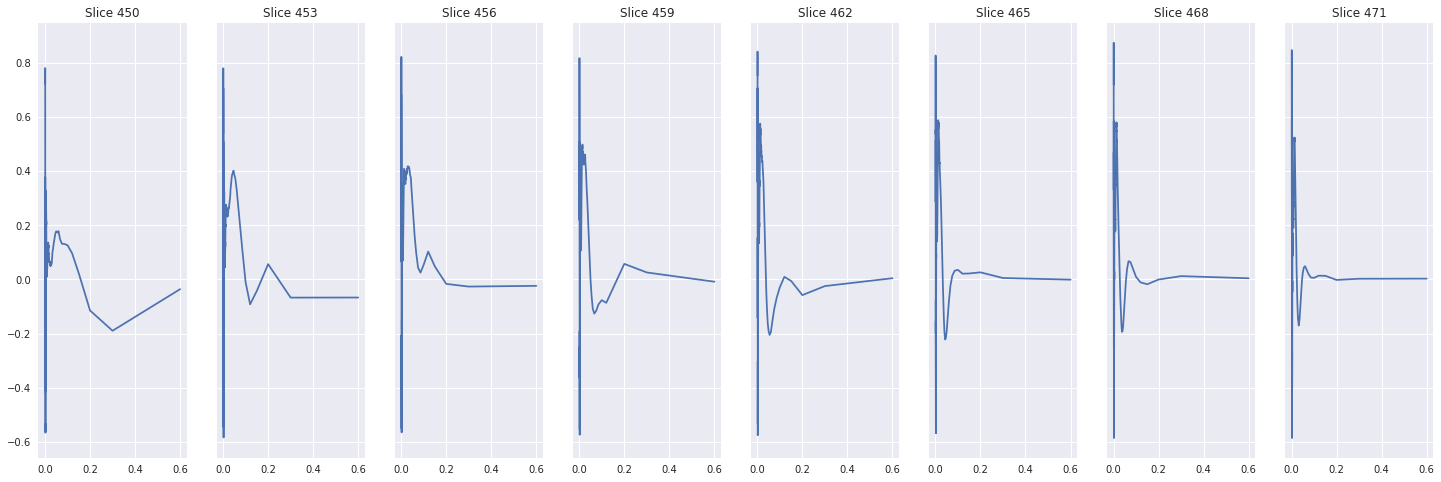

In [16]:
f, (ax1, ax2,ax3,ax4, ax5,ax6,ax7,ax8) = plt.subplots(1, 8, sharey=True,figsize = (25,8))
ax1.plot(freqs,cwtmatr[:,450])
ax2.plot(freqs,cwtmatr[:,453])
ax3.plot(freqs,cwtmatr[:,456])
ax4.plot(freqs,cwtmatr[:,459])
ax5.plot(freqs,cwtmatr[:,462])
ax6.plot(freqs,cwtmatr[:,465])
ax7.plot(freqs,cwtmatr[:,468])
ax8.plot(freqs,cwtmatr[:,471])
ax1.set_title('Slice 450')
ax2.set_title('Slice 453')
ax3.set_title('Slice 456')
ax4.set_title('Slice 459')
ax5.set_title('Slice 462')
ax6.set_title('Slice 465')
ax7.set_title('Slice 468')
ax8.set_title('Slice 471')
plt.show()

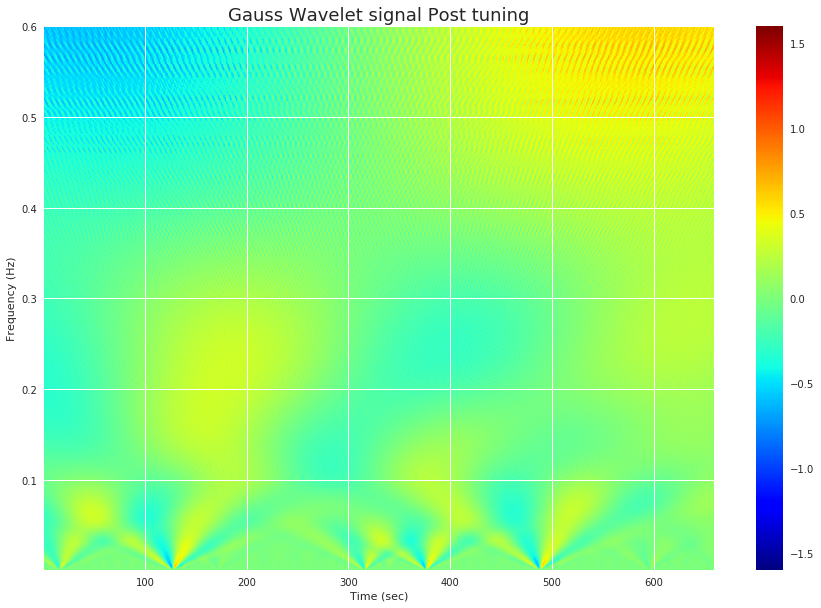

In [17]:
cwtmatr1, freqs1 = pywt.cwt(respPost, timesec, 'gaus7')
plt.figure(figsize = (15,10))
#im1=plt.imshow(cwtmatr1, extent=[timesec.min(), timesec.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto',interpolation ='bilinear',vmax=abs(cwtmatr1).max(), vmin=-abs(cwtmatr1).max(), origin='lower')
im1=plt.imshow(cwtmatr1, extent=[timesec.min(), timesec.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto', vmax= 1.6, vmin=-1.6,interpolation ='bilinear', origin='lower')
plt.colorbar(im1)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss Wavelet signal Post tuning', fontsize=18)
plt.show() 

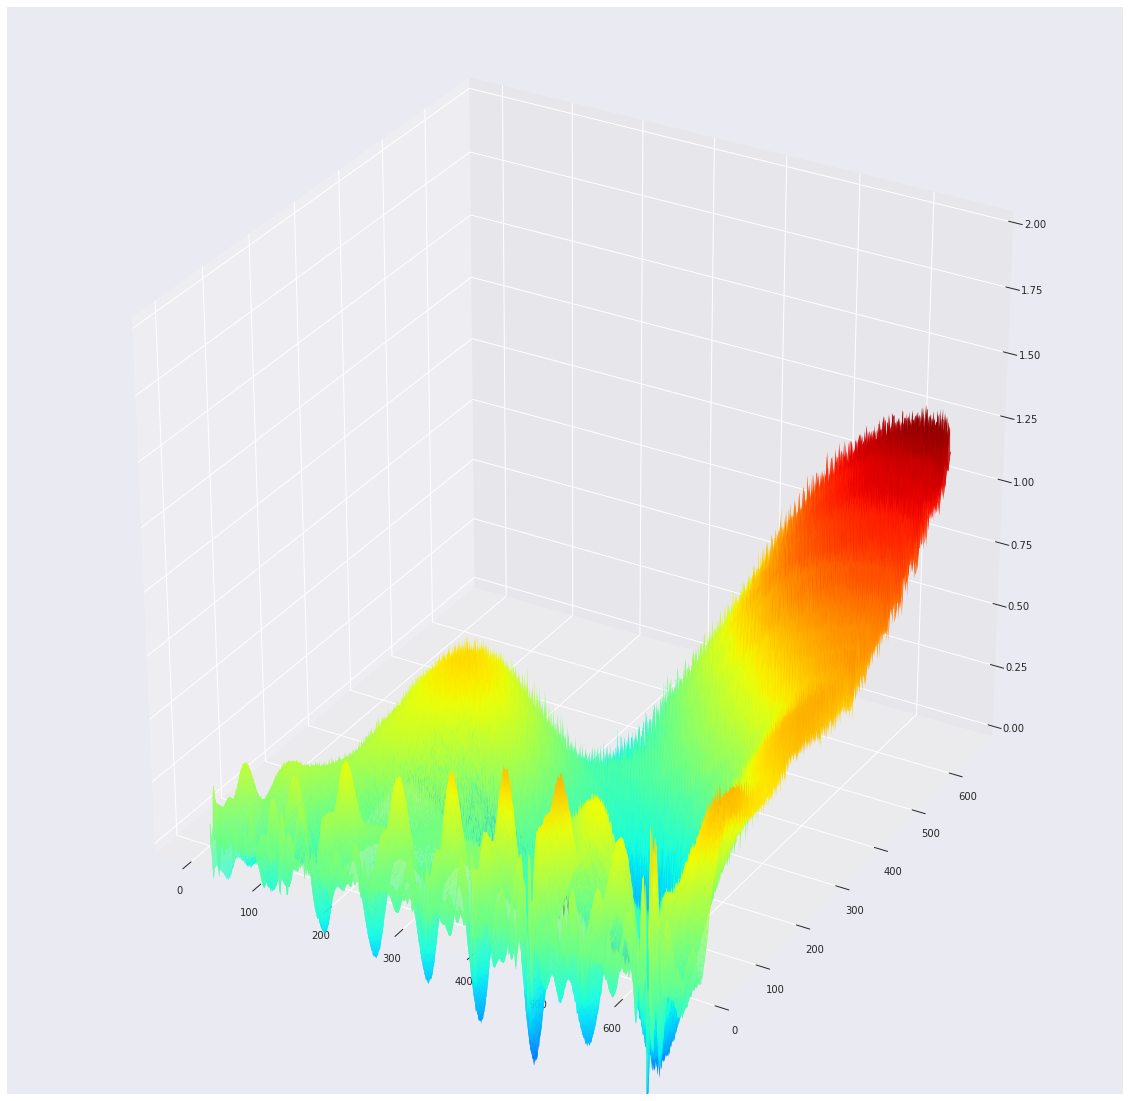

In [18]:
fig = plt.figure(facecolor='w',figsize = (20,20))
ax2 = fig.add_subplot(1,1,1,projection='3d')
x,y = np.mgrid[:cwtmatr.shape[0],:cwtmatr.shape[1]]
ax2.plot_surface(y,x,cwtmatr,cmap=pl.cm.jet,rstride=1,cstride=1,linewidth=0.,antialiased=True)
ax2.set_zlim3d(0,2)
#ax2.view_init(30, 270)
plt.show()

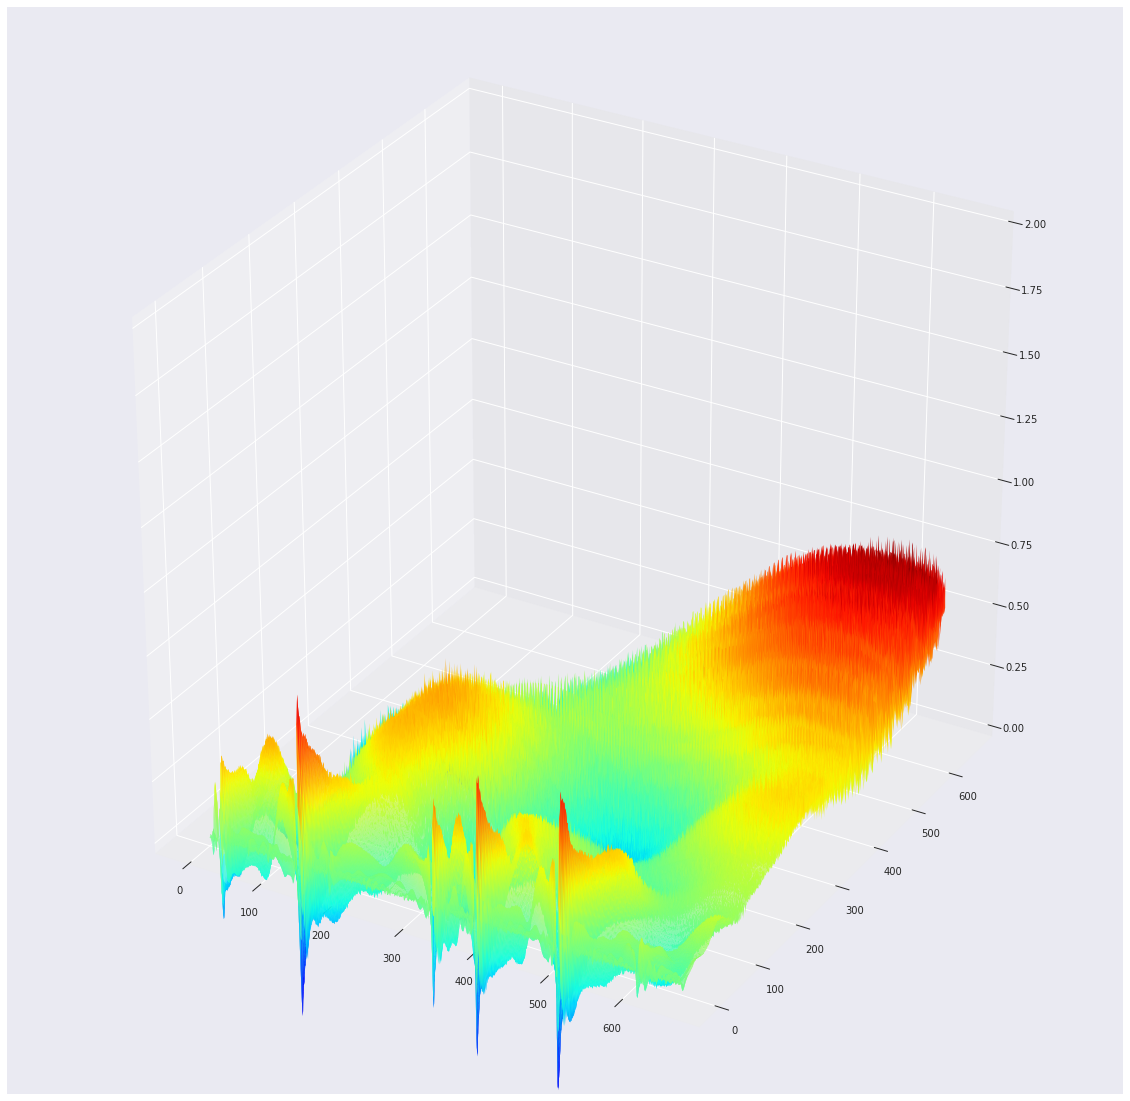

In [19]:
fig = plt.figure(facecolor='w',figsize = (20,20))
ax3 = fig.add_subplot(1,1,1,projection='3d')
x1,y1 = np.mgrid[:cwtmatr1.shape[0],:cwtmatr1.shape[1]]
ax3.plot_surface(y1,x1,cwtmatr1,cmap=pl.cm.jet,rstride=1,cstride=1,linewidth=0.,antialiased=True)
ax3.set_zlim3d(0,2)
#ax3.view_init(30, 270)
pl.show()

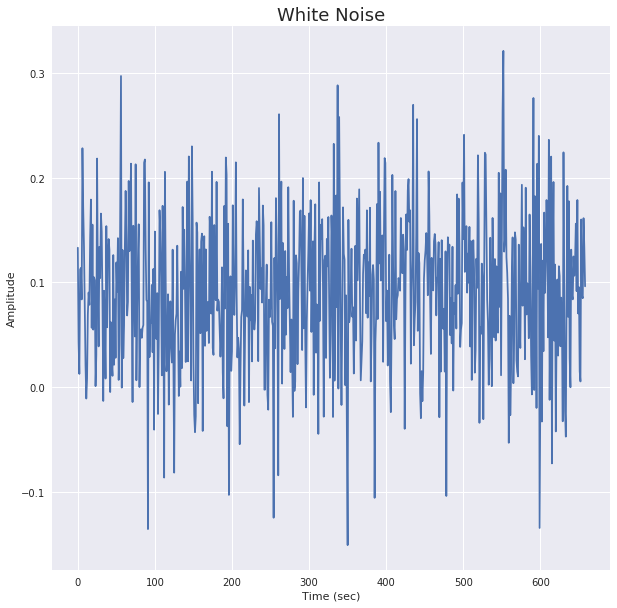

In [41]:
mean = np.average(np.asarray(np.delete(dfpre.values,[0,1],axis=1), dtype=np.float32))
std = np.std(np.asarray(np.delete(dfpre.values,[0,1],axis=1), dtype=np.float32))
num_samples = 659
samples = np.random.normal(mean, std, size=num_samples)
plt.figure(figsize = (10,10))
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('White Noise', fontsize=18)
plt.plot(samples)
plt.show()


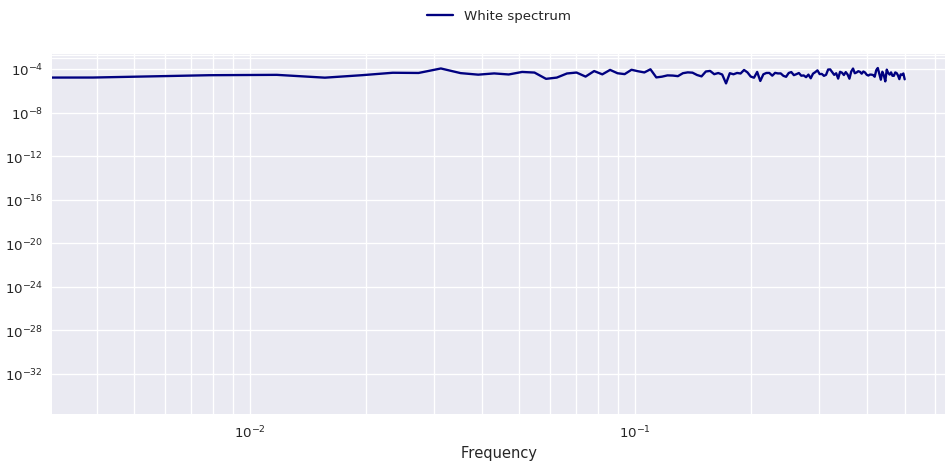

In [42]:
f, White_spec = signal.welch(samples, window ='boxcar',fs=1.0,nperseg =256,  scaling='spectrum') 
pdW_spectre=pd.DataFrame(data={'White spectrum':np.squeeze(np.absolute(White_spec)),'Frequency':f},dtype=float)
display(pdW_spectre)

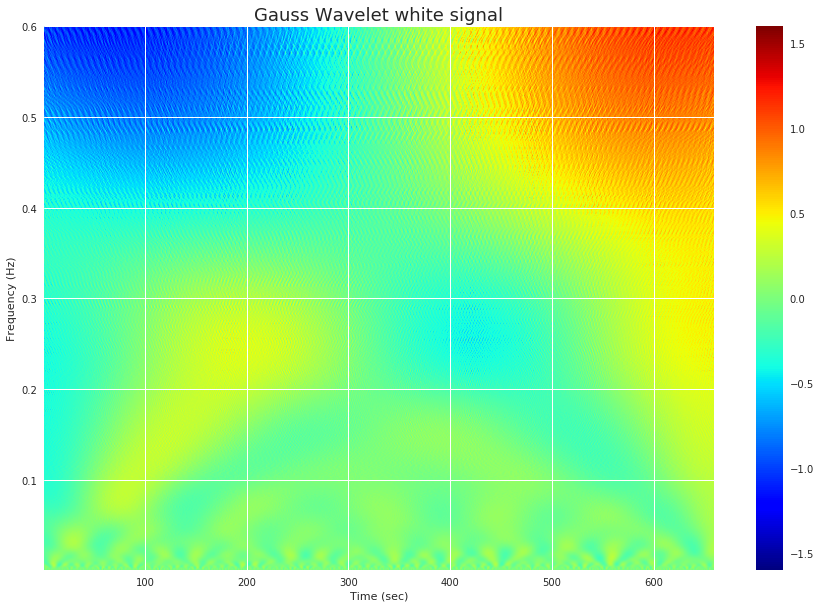

In [44]:
cwtmatrw, freqsw = pywt.cwt(samples, timesec, 'gaus7')
plt.figure(figsize = (15,10))
#im1=plt.imshow(cwtmatr1, extent=[timesec.min(), timesec.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto',interpolation ='bilinear',vmax=abs(cwtmatr1).max(), vmin=-abs(cwtmatr1).max(), origin='lower')
im1=plt.imshow(cwtmatrw, extent=[timesec.min(), timesec.max(), freqsw.min(), freqsw.max()], cmap='jet',  vmax= 1.6, vmin=-1.6,aspect='auto',interpolation ='bilinear', origin='lower')
plt.colorbar(im1)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss Wavelet white signal', fontsize=18)
plt.show() 

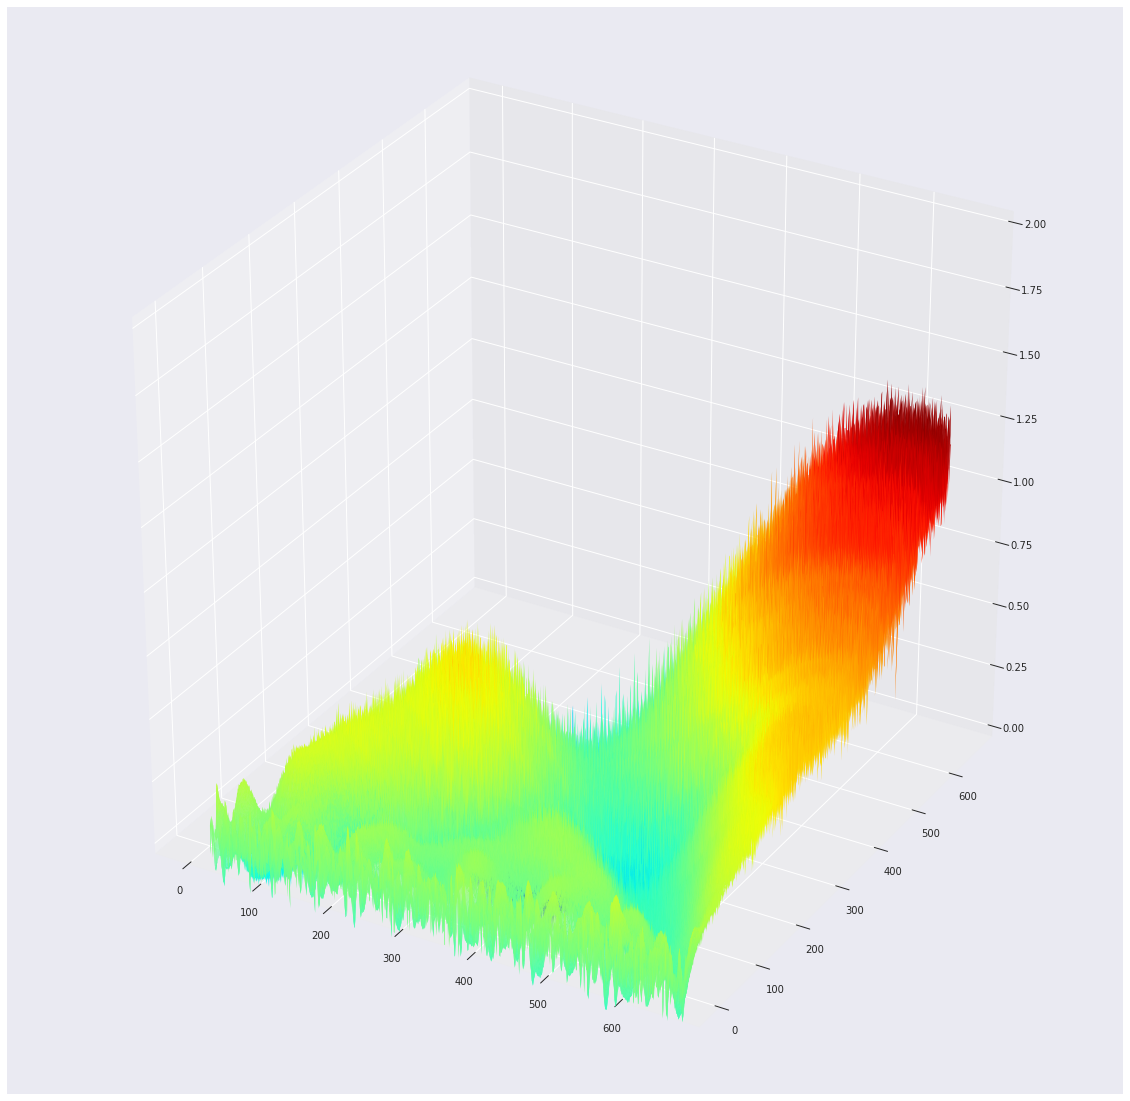

In [45]:
fig = plt.figure(facecolor='w',figsize = (20,20))
axw = fig.add_subplot(1,1,1,projection='3d')
x1,y1 = np.mgrid[:cwtmatrw.shape[0],:cwtmatrw.shape[1]]
axw.plot_surface(y1,x1,cwtmatrw,cmap=pl.cm.jet,rstride=1,cstride=1,linewidth=0.,antialiased=True)
axw.set_zlim3d(0,2)
pl.show()

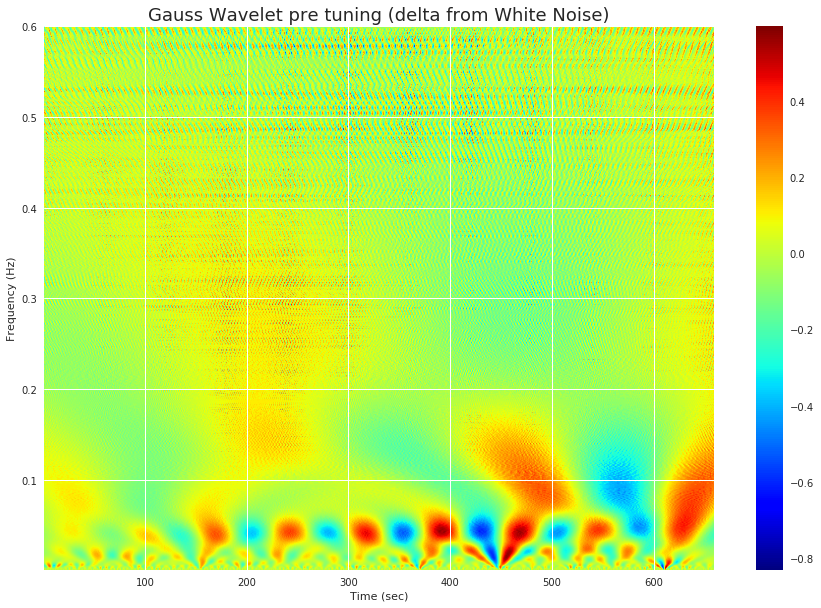

In [49]:
deltaW1=cwtmatr-cwtmatrw
plt.figure(figsize = (15,10))
im1=plt.imshow(deltaW1, extent=[timesec.min(), timesec.max(), freqsw.min(), freqsw.max()], cmap='jet', aspect='auto',interpolation ='bilinear', origin='lower')
plt.colorbar(im1)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss Wavelet pre tuning (delta from White Noise)', fontsize=18)
plt.show() 

In [ ]:
mean = np.average(np.asarray(np.delete(dfpost.values,[0,1],axis=1), dtype=np.float32))
std = np.std(np.asarray(np.delete(dfpost.values,[0,1],axis=1), dtype=np.float32))
num_samples = 659
samplesp = np.random.normal(mean, std, size=num_samples)
plt.figure(figsize = (10,10))
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('White Noise post like', fontsize=18)
plt.plot(samples)
plt.show()

In [ ]:
cwtmatrwp, freqsw = pywt.cwt(samplesp, timesec, 'gaus7')
plt.figure(figsize = (15,10))
#im1=plt.imshow(cwtmatr1, extent=[timesec.min(), timesec.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto',interpolation ='bilinear',vmax=abs(cwtmatr1).max(), vmin=-abs(cwtmatr1).max(), origin='lower')
im1=plt.imshow(cwtmatrwp, extent=[timesec.min(), timesec.max(), freqsw.min(), freqsw.max()], cmap='jet',  vmax= 1.6, vmin=-1.6,aspect='auto',interpolation ='bilinear', origin='lower')
plt.colorbar(im1)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss Wavelet white signal post like', fontsize=18)
plt.show() 

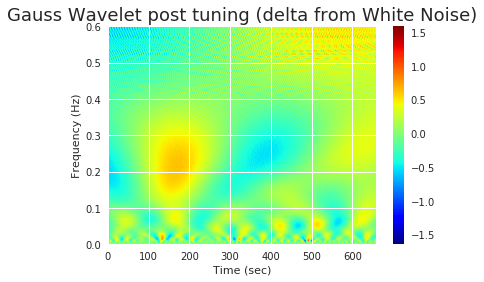

In [25]:
deltaW1=cwtmatr1-cwtmatrw
im1=plt.imshow(deltaW1, extent=[timesec.min(), timesec.max(), freqsw.min(), freqsw.max()], cmap='jet', aspect='auto',interpolation ='bilinear', origin='lower')
plt.colorbar(im1)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss Wavelet post tuning (delta from White Noise)', fontsize=18)
plt.show() 

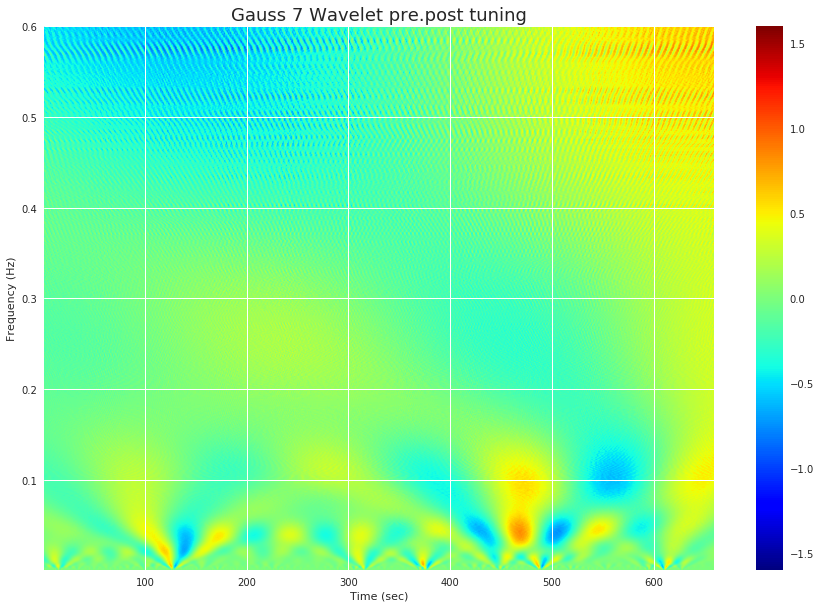

In [26]:
deltaW1=cwtmatr-cwtmatr1
plt.figure(figsize = (15,10))
im1=plt.imshow(deltaW1, extent=[timesec.min(), timesec.max(), freqsw.min(), freqsw.max()], cmap='jet', aspect='auto', vmax= 1.6, vmin=-1.6,interpolation ='bilinear', origin='lower')
plt.colorbar(im1)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss 7 Wavelet pre.post tuning', fontsize=18)
plt.show() 

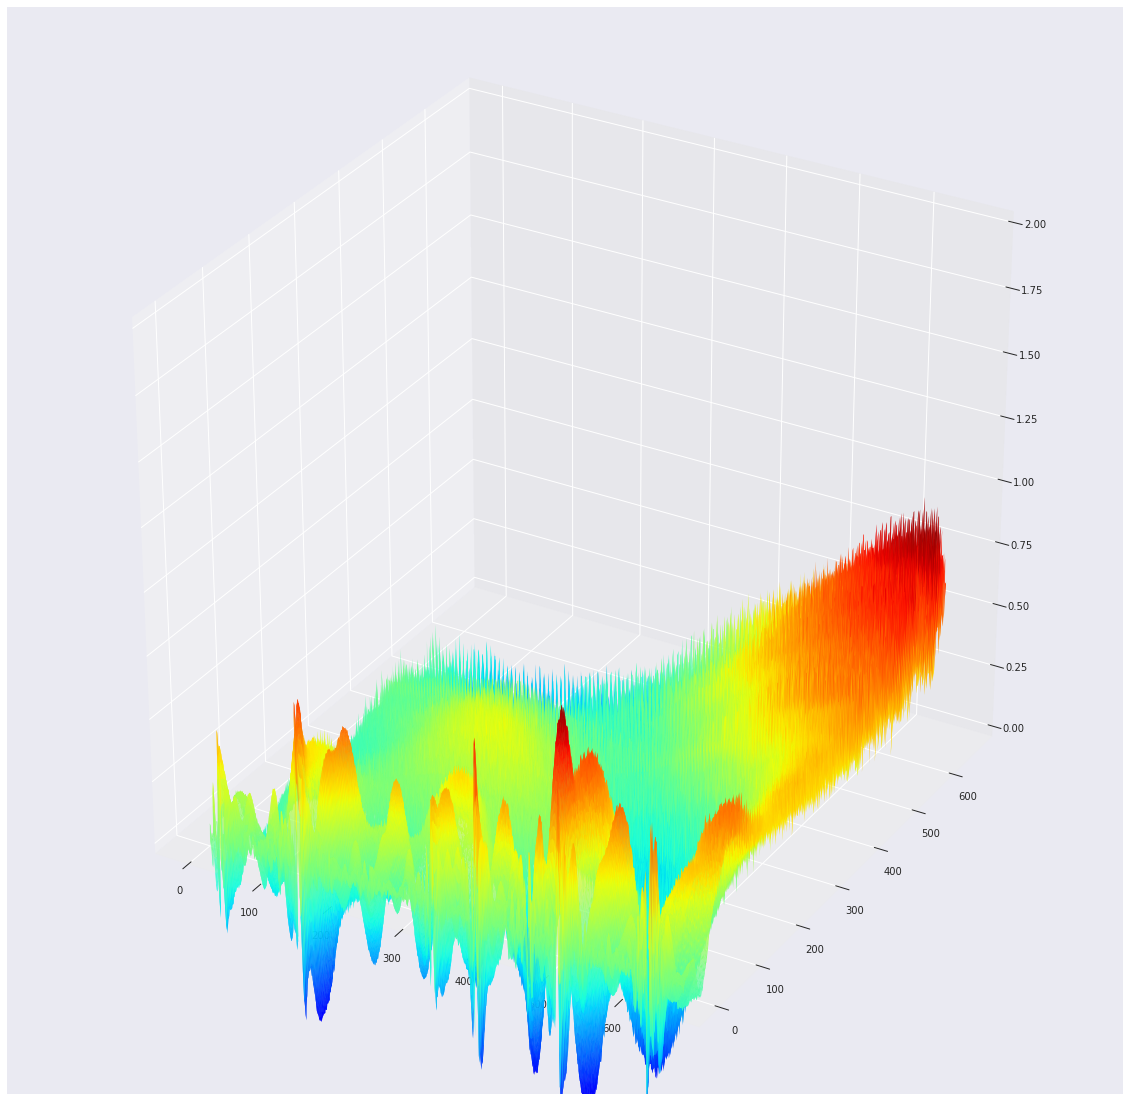

In [27]:
fig = plt.figure(facecolor='w',figsize = (20,20))
axw = fig.add_subplot(1,1,1,projection='3d')
x1,y1 = np.mgrid[:deltaW1.shape[0],:deltaW1.shape[1]]
axw.plot_surface(y1,x1,deltaW1,cmap=pl.cm.jet,rstride=1,cstride=1,linewidth=0.,antialiased=True)
axw.set_zlim3d(0,2)
pl.show()